## [Multivariate Linear Regression](https://machinelearningmastery.com/linear-regression-tutorial-using-gradient-descent-for-machine-learning/) applied for prediction

### Description

Multivariate linear regression is a statistical method that studies the relationship between multiple variables:
* *m* variables $x=\{x_1, x_2, ..., x_m\}$: the predictor, explanatory, independent variables,
* one y variable: the response, outcome, dependent variable.

### Definition

With multivariate linear regression the data is modeled as follows  
$y = w_0 + w_1 * x_1 + w_2 * x_2 + ... + w_m * x_m$  
where $w_0, w_1, ..., w_m$ are the coefficients we must estimate from the training data.

Coefficients can be found using (stochastic) gradient descent.  

#### Gradient descent

Gradient descent (GD) is the process of minimizing a function by following the gradients of the cost function.  
This involves knowing the form of the cost function as well as the derivative,  
so that from a given point you know the gradient and can move in that direction, e.g. downhill towards the minimum value.

In GD optimization, the cost gradient is computed based on the *complete training set*  
and the weights are updated incrementally after each epoch (each pass over the entire training dataset):  
* the **cost function** is the sum of squared errors (SSE): $C = \frac{1}{2n} \sum_{i}^{n}{(\hat{y}^{(i)} - y^{(i)})^2}$  
* the magnitude and direction of the **weight update** are computed by taking a step in the opposite direction of the cost gradient:  
$\Delta w_j = -\eta \frac{\partial C}{\partial w_j} = \eta \frac{1}{n} \sum_i^{n}{(\hat{y}^{(i)} - y^{(i)})} x_j^{(i)}$  
where $\eta$ is the learning rate - a constant limiting the correction amount of each coefficient at each update
* the weights are then updated after each epoch via the **update rule**: $w = w + \Delta w$

Using GD can be quite costly. The larger the training set:
* the slower the algorithm updates the weights
* the longer it may take until it converges to the global cost minimum.

In [1]:
def predict(x, weights):
    return x.dot(weights)

def compute_cost(x, y, weights):
    lse = (np.dot(x, weights) - y)**2
    return np.sum(lse) / (2 * len(y))

def gradient_descent(x, y, learning_rate, epochs):
    n = x.shape[0]
    m = x.shape[-1]
    weights = np.zeros(m)

    costs = []
    for epoch in range(epochs):
        prediction = predict(x, weights)
        error = prediction - y
        gradient = x.T.dot(error) / n
        weights -= learning_rate * gradient
        costs.append(compute_cost(x, y, weights))

    return weights, costs

#### Stochastic gradient descent

The stochastic gradient descent (SGD) is a *stochastic approximation* of the gradient descent optimization.  
In SGD optimization we don't accumulate the weight updates; instead, we update the weights after *each training sample*.

The way this optimization algorithm works:
* the training instances are shown to the model one at a time: $x^{(i)}$
* the model makes a prediction for each training instance
  * the error is calculated: $\hat{y}^{(i)} - y^{(i)}$
  * the model is updated in order to reduce the error for the next prediction: $w = w - \eta * (\hat{y}^{(i)} - y^{(i)}) * x^{(i)}$
* the process is repeated for a fixed number of iterations (*epochs*).

We update each coefficient for each row in the training data, each epoch.

In [2]:
def stochastic_gradient_descent(x, y, learning_rate, epochs):
    n = x.shape[0]
    m = x.shape[-1]
    weights = np.zeros(m)
    
    costs = []
    for epoch in range(epochs):
        for i in range(n):
            prediction = predict(x[i], weights)
            error = prediction - y[i]
            weights -= learning_rate * error * x[i]
            
        costs.append(compute_cost(x, y, weights))
        
    return weights, costs

#### Mini-batch gradient descent

Mini-Batch Gradient Descent (MB-GD) is a compromise between GD and SGD.  

In MB-GD, we update the model based on smaller groups of training samples.  
Instead of computing the gradient from 1 training sample (SGD) or from all *n* training samples (GD),  
we compute the gradient from $1 < k < n$ training samples (a common mini-batch size is k=32).  

MB-GD converges in fewer iterations than GD because the weights are updated more frequently.  
However, MB-GD makes use of vectorized operations, which typically results in a computational performance gain over SGD.

In [3]:
import random

def minibatch_gradient_descent(x, y, batch_size, learning_rate, epochs):
    n = x.shape[0]
    m = x.shape[-1]
    weights = np.zeros(m)
    
    costs = []
    for epoch in range(epochs):
        # shuffle the data (by index)
        rand_index = list(range(n))
        random.shuffle(rand_index)
        
        for i in range(0, n, batch_size):
            # get a list of indices for the current minibatch
            mb_index = rand_index[i:i + batch_size]
            
            sx = x[mb_index]
            sy = y[mb_index] 
            
            prediction = predict(sx, weights)
            error = prediction - sy
            gradient = sx.T.dot(error) / len(sx)
            weights -= learning_rate * gradient
            
        costs.append(compute_cost(x, y, weights))
        
    return weights, costs

### Application

The predictive ability of the multivariate linear regression is tested on the [Boston house prices](https://www.kaggle.com/vikrishnan/boston-house-prices) dataset.  
The houses are described in terms of size and number of bedrooms.  
The target variable is their price.


In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_csv(
    '/src/data/02_mlr_housing.csv', 
    header=None,
    names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Note that these features have very different ranges of values.  
When features differ by orders of magnitude, first perform feature scaling.  
It can help gradient descent converge more quickly.

In [7]:
train = data.sample(frac=0.8)
test = data.drop(train.index)

train_mean = train.mean()
train_std = train.std()

train = (train - train_mean) / train_std
test = (test - train_mean) / train_std

print("New values in train data:\n{}".format(train.head()))
print("\nNew values in test data:\n{}".format(test.head()))

New values in train data:
         CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
472 -0.033238 -0.470943  1.011787 -0.266931  0.187341  0.220733  0.201151   
56  -0.416645  3.306369 -1.560932 -0.266931 -1.252807  0.145347 -1.189953   
452  0.131172 -0.470943  1.011787 -0.266931  1.314044  0.025287  0.795822   
29  -0.310542 -0.470943 -0.464266 -0.266931 -0.168461  0.551595  0.636535   
4   -0.411404 -0.470943 -1.347527 -0.266931 -0.846177  1.211922 -0.535107   

          DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
472 -0.413583  1.606748  1.495232  0.796209  0.411760  0.247815  0.064212  
56   2.548851 -0.884746 -0.589841 -0.560847  0.449951 -0.951743  0.225139  
452 -0.662355  1.606748  1.495232  0.796209  0.322182  0.654184 -0.697508  
29   0.218591 -0.658247 -0.625281  1.170569  0.269603 -0.084543 -0.171814  
4    1.077123 -0.771496 -1.127352  0.094283  0.449951 -1.013188  1.458910  

New values in test data:
        CRIM        ZN     IN

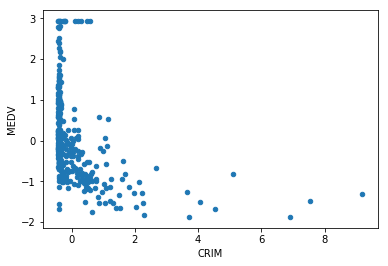

In [8]:
train.plot(kind='scatter', x='CRIM', y='MEDV')

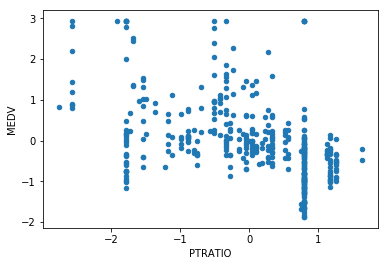

In [9]:
train.plot(kind='scatter', x='PTRATIO', y='MEDV')

Use the $MEDV$ feature as the target variable and all other features as the predictor variables.

In [10]:
x = train.loc[:, train.columns != 'MEDV']
x.insert(0, 'Ones', 1.0)
x = x.values
print(x.shape)

(405, 14)


In [11]:
y = train.MEDV.values
print(y[0:5])
print(y.shape)

[ 0.06421176  0.22513852 -0.69750823 -0.17181415  1.45891034]
(405,)


Plot the cost over each epoch

In [12]:
def plot_costs(costs):
    plt.figure()
    plt.plot(np.arange(len(costs)), costs, 'r')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Error vs. Training Epoch')
    plt.show()
    plt.close()

#### Gradient descent evaluation

In [13]:
# set the variables for gradient descent
eta = 0.01
epochs = 300

weights, costs = gradient_descent(x, y, eta, epochs)
print("Weights: {}".format([w.round(3) for w in weights]))
print("Final cost: {}".format(costs[-1]))

Weights: [0.0, -0.078, 0.037, -0.058, 0.094, -0.096, 0.343, 0.02, -0.177, 0.089, -0.029, -0.199, 0.085, -0.38]
Final cost: 0.13966278863891748


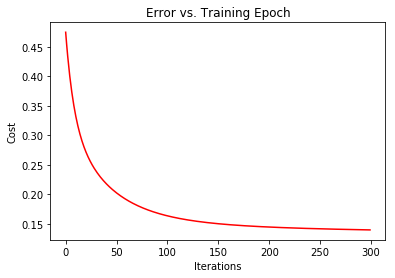

In [14]:
plot_costs(costs)

#### Stochastic gradient descent evaluation

In [15]:
# set the variables for stochastic gradient descent
eta = 0.001
epochs = 200

weights, costs = stochastic_gradient_descent(x, y, eta, epochs)
print("Weights: {}".format([w.round(3) for w in weights]))
print("Final cost: {}".format(costs[-1]))

Weights: [0.001, -0.114, 0.099, -0.006, 0.08, -0.259, 0.265, 0.081, -0.308, 0.336, -0.21, -0.248, 0.078, -0.455]
Final cost: 0.13067854319963193


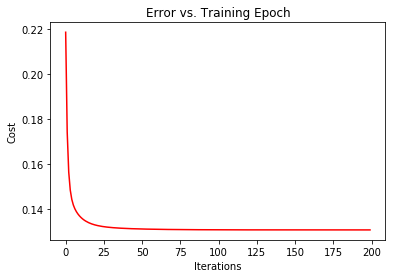

In [16]:
plot_costs(costs)

#### Mini-batch gradient descent 

In [17]:
# set the variables for mini-batch gradient descent
eta = 0.01
epochs = 100
batch_size = 32

weights, costs = minibatch_gradient_descent(x, y, batch_size, eta, epochs)
print("Weights: {}".format([w.round(3) for w in weights]))
print("Final cost: {}".format(costs[-1]))

Weights: [0.001, -0.104, 0.074, -0.052, 0.085, -0.223, 0.279, 0.068, -0.292, 0.218, -0.083, -0.238, 0.079, -0.452]
Final cost: 0.1316906543233854


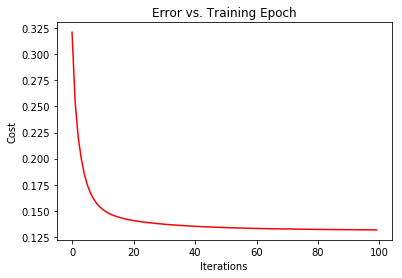

In [18]:
plot_costs(costs)

#### Solve the problem using sklearn's LinearRegression model

In [19]:
from sklearn.linear_model import LinearRegression

x = train.loc[:, train.columns != 'MEDV'].values

model = LinearRegression()
model.fit(x, y)

m = x.shape[-1] + 1
weights = np.zeros(m)
weights[0] = model.intercept_
for i in range(1, m): 
    weights[i] = model.coef_[i-1]
print("Model's coefficients\nWeights: {}".format([w.round(3) for w in weights]))

Model's coefficients
Weights: [0.0, -0.114, 0.093, -0.002, 0.076, -0.256, 0.266, 0.08, -0.305, 0.336, -0.217, -0.247, 0.077, -0.454]


#### Evaluate model performance

In [20]:
tx = test.loc[:, test.columns != 'MEDV'].values
ty = test.MEDV.values

print("Model's predictive performance: r2={:.2f}".format(model.score(tx, ty)))

Model's predictive performance: r2=0.73
